In [9]:
import torch

In [10]:
# 假设我们相对函数 y=2x^Tx，关于列向量 x 求导
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [14]:
# 在我们计算 y 关于 x 的梯度前，我们需要一个地方来存储梯度
x.requires_grad_(True)
x.grad

In [15]:
# 计算 y
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [16]:
# 通过调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

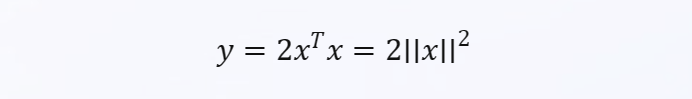

In [17]:
# 在默认情况下，PyTorch 会累积梯度，我们需要清除之前的值
x.grad.zero_()   # 清除 x 之前的t梯度
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [21]:
# 将某些计算移动到记录的计算图外
x.grad.zero_()

y = x * x   # 向量
u = y.detach()  # 将 y 看作常量
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
# 即使构建函数的计算图需要通过 python 控制流（条件，循环或任意函数调用），我们仍然可以计算得到变量的梯度
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else：
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()